## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 5

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Flatten, Dense, SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt

In [2]:
def generate_time_series(sample_size, n_steps): 
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1) 
    time = np.linspace(0, 1, n_steps) 
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
sample_size, n_steps = 10000, 51
series = generate_time_series(sample_size, n_steps)

In [4]:
X = series[:, :50]
y = series[:, 50]

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

## FCNN

In [6]:
FCNN = Sequential([
    InputLayer(input_shape=(50,1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
FCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
FCNN.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics='mae')
h = FCNN.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
875/875 [==============================] - 2s 2ms/step - loss: 0.0119 - mae: 0.0783 - val_loss: 0.0048 - val_mae: 0.0556
Epoch 2/20
875/875 [==============================] - 1s 2ms/step - loss: 0.0055 - mae: 0.0596 - val_loss: 0.0042 - val_mae: 0.0524
Epoch 3/20
875/875 [==============================] - 1s 2ms/step - loss: 0.0050 - mae: 0.0565 - val_loss: 0.0055 - val_mae: 0.0604
Epoch 4/20
875/875 [==============================] - 1s 2ms/step - loss: 0.0047 - mae: 0.0545 - val_loss: 0.0041 - val_mae: 0.0517
Epoch 5/20
875/875 [==============================] - 1s 2ms/step - loss: 0.0047 - mae: 0.0548 - val_loss: 0.0034 - val_mae: 0.0471
Epoch 6/20
875/875 [==============================] - 1s 2ms/step - loss: 0.0045 - mae: 0.0539 - val_loss: 0.0036 - val_mae: 0.0481
Epoch 7/20
875/875 [==============================] - 2s 2ms/step - loss: 0.0046 - mae: 0.0542 - val_loss: 0.0048 - val_mae: 0.0557
Epoch 8/20
875/875 [==============================] - 1s 2ms/step - loss: 0.

In [9]:
FCNN.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0585


[0.005224220454692841, 0.058541636914014816]

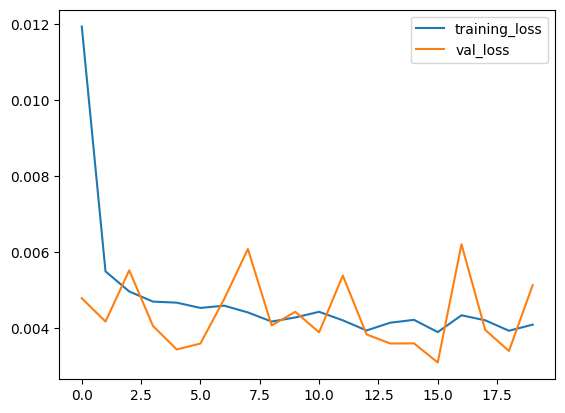

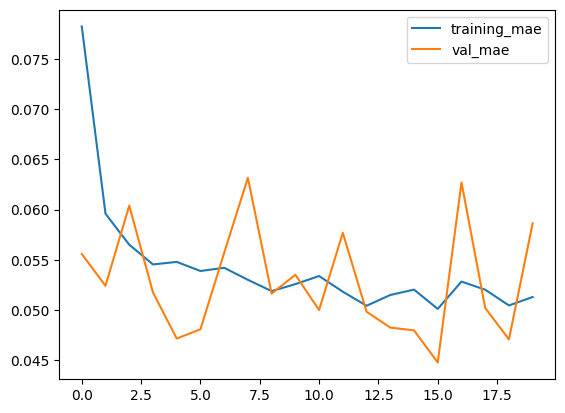

In [13]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['mae'], label='training_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

## SimpleRNN - one hidden layer

In [14]:
rnn1 = Sequential([
    InputLayer(input_shape=(50, 1)),
    SimpleRNN(64, activation='tanh'),
    Dense(1),
])
rnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
rnn1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics='mae')
h = rnn1.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
875/875 [==============================] - 6s 6ms/step - loss: 0.0058 - mae: 0.0579 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 2/20
875/875 [==============================] - 5s 5ms/step - loss: 0.0036 - mae: 0.0486 - val_loss: 0.0031 - val_mae: 0.0448
Epoch 3/20
875/875 [==============================] - 5s 6ms/step - loss: 0.0037 - mae: 0.0494 - val_loss: 0.0034 - val_mae: 0.0468
Epoch 4/20
875/875 [==============================] - 5s 6ms/step - loss: 0.0037 - mae: 0.0492 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 5/20
875/875 [==============================] - 5s 5ms/step - loss: 0.0037 - mae: 0.0494 - val_loss: 0.0031 - val_mae: 0.0449
Epoch 6/20
875/875 [==============================] - 5s 6ms/step - loss: 0.0036 - mae: 0.0485 - val_loss: 0.0034 - val_mae: 0.0468
Epoch 7/20
875/875 [==============================] - 5s 5ms/step - loss: 0.0036 - mae: 0.0483 - val_loss: 0.0032 - val_mae: 0.0455
Epoch 8/20
875/875 [==============================] - 5s 5ms/step - loss: 0.

In [16]:
rnn1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0474


[0.0034328876063227654, 0.04740825667977333]

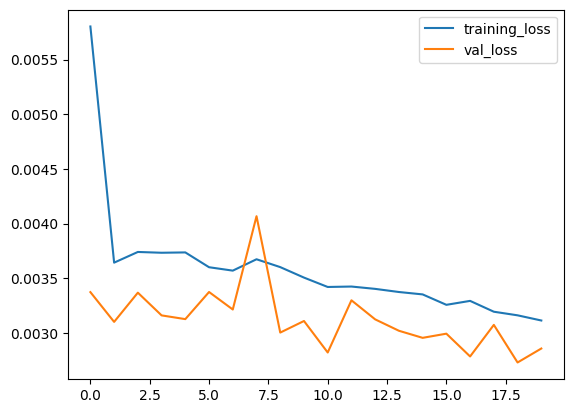

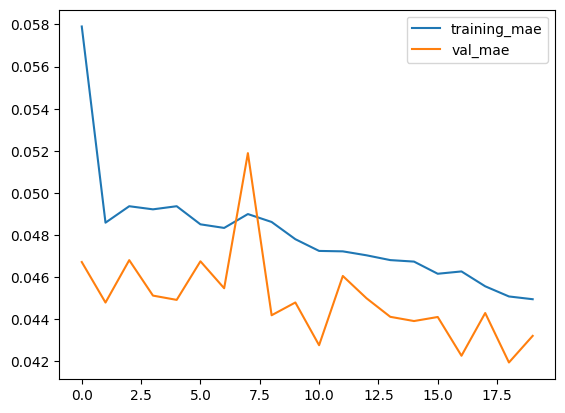

In [17]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['mae'], label='training_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

## SimpleRNN - two hidden layers

In [18]:
rnn2 = Sequential([
    InputLayer(input_shape=(50, 1)),
    SimpleRNN(64, activation='tanh', return_sequences=True),
    SimpleRNN(64, activation='tanh'),
    Dense(1),
])
rnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 64)            4224      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12545 (49.00 KB)
Trainable params: 12545 (49.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rnn2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics='mae')
h = rnn2.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
875/875 [==============================] - 12s 12ms/step - loss: 0.0092 - mae: 0.0657 - val_loss: 0.0037 - val_mae: 0.0485
Epoch 2/20
875/875 [==============================] - 10s 12ms/step - loss: 0.0036 - mae: 0.0482 - val_loss: 0.0032 - val_mae: 0.0453
Epoch 3/20
875/875 [==============================] - 10s 12ms/step - loss: 0.0034 - mae: 0.0468 - val_loss: 0.0027 - val_mae: 0.0412
Epoch 4/20
875/875 [==============================] - 12s 14ms/step - loss: 0.0033 - mae: 0.0462 - val_loss: 0.0029 - val_mae: 0.0432
Epoch 5/20
875/875 [==============================] - 11s 13ms/step - loss: 0.0034 - mae: 0.0469 - val_loss: 0.0032 - val_mae: 0.0453
Epoch 6/20
875/875 [==============================] - 11s 12ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 7/20
875/875 [==============================] - 19s 22ms/step - loss: 0.0034 - mae: 0.0470 - val_loss: 0.0029 - val_mae: 0.0434
Epoch 8/20
875/875 [==============================] - 23s 26ms

In [20]:
rnn2.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0403


[0.002448179991915822, 0.040291160345077515]

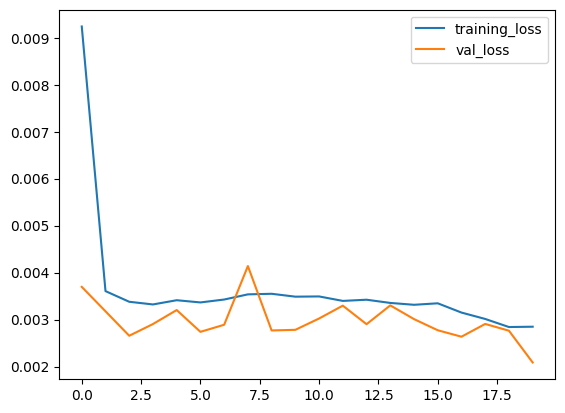

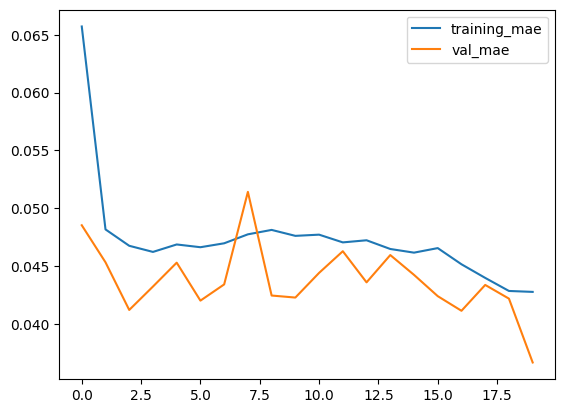

In [21]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['mae'], label='training_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

### SimpleRNN with 2 hidden layers performed the best and FCNN performed the worst.
### RNN (2 hidden layers) > RNN (1 hidden layers) > FCNN